In [19]:
import pomegranate as pg

In [20]:
rain = pg.DiscreteDistribution({'T': 0.2, 'F': 0.8})

In [21]:
sprinkler = pg.ConditionalProbabilityTable(
    [[ 'T', 'T', 0.01 ],
     [ 'T', 'F', 0.99 ],
     [ 'F', 'T', 0.4 ],
     [ 'F', 'F', 0.6 ]], [rain])

In [22]:
grass_wet = pg.ConditionalProbabilityTable(
    [[ 'T', 'T', 'T', 0.99 ],
     [ 'T', 'T', 'F', 0.01 ],
     [ 'T', 'F', 'T', 0.9 ],
     [ 'T', 'F', 'F', 0.1 ],
     [ 'F', 'T', 'T', 0.8 ],
     [ 'F', 'T', 'F', 0.2 ],
     [ 'F', 'F', 'T', 0.0 ],
     [ 'F', 'F', 'F', 1.0 ]], [sprinkler, rain])

In [23]:
s1 = pg.State(rain, name="rain")
s2 = pg.State(sprinkler, name="sprinkler")
s3 = pg.State(grass_wet, name="grass_wet")

In [24]:
model = pg.BayesianNetwork("Grass Wet Problem")
model.add_states(s1, s2, s3)

In [25]:
model.add_edge(s1, s2)
model.add_edge(s1, s3)
model.add_edge(s2, s3)

In [26]:
model.bake()

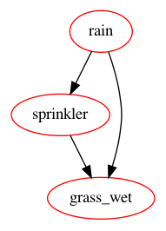

In [27]:
model.plot()

In [29]:
observations = {
    'sprinkler': 'T',
    'rain': 'T',
}
beliefs = map(str, model.predict_proba(observations))
print("\n".join( "{}\t{}".format(state.name, belief) for state, belief in zip(model.states, beliefs)))

rain	T
sprinkler	T
grass_wet	{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "T" : 0.9899999999999998,
            "F" : 0.010000000000000222
        }
    ],
    "frozen" : false
}


In [30]:
observations = {
    'rain': 'T',
}
beliefs = map(str, model.predict_proba(observations))
print("\n".join( "{}\t{}".format(state.name, belief) for state, belief in zip(model.states, beliefs)))

rain	T
sprinkler	{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "T" : 0.010000000000000443,
            "F" : 0.9899999999999995
        }
    ],
    "frozen" : false
}
grass_wet	{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "T" : 0.8019,
            "F" : 0.19810000000000005
        }
    ],
    "frozen" : false
}


In [31]:
observations = {
    'grass_wet': 'T',
}
beliefs = map(str, model.predict_proba(observations))
print("\n".join( "{}\t{}".format(state.name, belief) for state, belief in zip(model.states, beliefs)))

rain	{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "T" : 0.06311553590126792,
            "F" : 0.936884464098732
        }
    ],
    "frozen" : false
}
sprinkler	{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "T" : 0.9504408226462099,
            "F" : 0.0495591773537901
        }
    ],
    "frozen" : false
}
grass_wet	T


In [32]:
observations = {
    'rain': 'T',
}
beliefs = map(str, model.predict_proba(observations))
print("\n".join( "{}\t{}".format(state.name, belief) for state, belief in zip(model.states, beliefs)))

rain	T
sprinkler	{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "T" : 0.010000000000000443,
            "F" : 0.9899999999999995
        }
    ],
    "frozen" : false
}
grass_wet	{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "T" : 0.8019,
            "F" : 0.19810000000000005
        }
    ],
    "frozen" : false
}
